In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import re
import nltk
from nltk.corpus import stopwords
from textblob import Word


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.txt',sep=';')
df1=df.copy()

In [4]:
df4=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweet_emotions.csv')
df4=df4.drop('tweet_id',axis=1)
df5=df4.copy()

In [5]:
df4.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [6]:
df.sentiments.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: sentiments, dtype: int64

In [7]:
excited=["I'm thrilled to be going on this adventure.","I'm elated that my team won the game."
,"This news has me ecstatic.","I'm overjoyed to finally be home.","I'm exhilarated by the thrill of the roller coaster."
,"I'm delighted to have this opportunity.","I'm ecstatic about my upcoming graduation."
,"I'm ecstatic to be going on vacation.","I'm overjoyed to be expecting a baby."
,"I'm thrilled to have finished my thesis.","This news has me over the moon."
,"I'm ecstatic to have a new job.","I'm thrilled to have this opportunity to travel."
,"I'm elated to have completed my training.","I'm overjoyed to be starting a new chapter in my life."
,"I'm ecstatic to be getting married.","I'm delighted to have a new puppy."
,"I'm thrilled to have my family coming to visit.","I'm ecstatic to have received a promotion."
,"I'm overjoyed to be going on a road trip.","I'm elated to have a new house."
,"I'm thrilled to have a new car.","I'm ecstatic to be going on a cruise."
,"I'm delighted to have a new book to read.","I'm overjoyed to be going to a concert."
,"I'm thrilled to be going to a theme park.","I'm ecstatic to be going on a camping trip.","I'm elated to have a new hobby."
,"I'm overjoyed to have a new friend.","I'm thrilled to have a new phone.","I'm ecstatic to have a new job."
,"I'm delighted to have a new laptop.","I'm overjoyed to be going on a ski trip."
,"I'm thrilled to be going to a baseball game.","I'm ecstatic to be going to a football game."
,"I'm elated to have a new TV.","I'm overjoyed to have a new bike.","I'm thrilled to have a new wardrobe."
,"I'm ecstatic to have a new camera.","I'm delighted to have a new plant."
,"I'm overjoyed to be going to a music festival.","I'm thrilled to be going to a art festival."
,"I'm ecstatic to be going to a food festival.","I'm elated to have a new book."
,"I'm overjoyed to have a new music album.","I'm thrilled to have a new movie."
,"I'm ecstatic to have a new video game.","I'm delighted to have a new board game."
,"I'm overjoyed to have a new puzzle.","I'm thrilled to have a new toy"
,"Thrilled"
,"Elated"
,"Enthusiastic","Eager","Delighted","Joyful","Roused"
,"Animated","Exhilarated","Pleased","Ecstatic","Overjoyed","Enthusiastic"
,"Enraptured","Euphoric","Exalted","Rapturous","Overwhelmed","Stimulated","Amped"
,"Energized","Revved up","Aroused","Invigorated","Charged","Vibrant"
,"Vigorous","High-spirited"
,"Determined","Daring"
,"Bold","Fearless","Courageous","Confident"
,"Assured","Positive","Optimistic","Hopeful","Ambitious"
,"Driven","Passionate","Ardent","Zealous","Enamored","Smitten","Infatuated","In love","Enamored","Head over heels","Crazy about"        
]

In [8]:
frustrated=["The thought of seeing my favorite band live has me feeling thrilled."
 ,"I'm elated to have been accepted into my top choice university."
,"I'm ecstatic to be going on a trip with my best friends.","I'm overjoyed to be expecting a baby."
,"I'm exhilarated to be starting my new job tomorrow.","I'm delighted to have found a new hobby that I enjoy."
 ,"I'm excited to finally be moving into my new home.","I'm thrilled to have been promoted at work."
 ,"I'm elated to have received frustrated a scholarship for my education."
,"I'm ecstatic to be graduating from college.","I'm overjoyed to be getting married next month."
 ,"I'm exhilarated to be going bungee jumping for the first time."
,"I'm delighted to have made a new friend in my new city.","I'm excited to be going on a road trip with my family."
 ,"I'm thrilled to have been given the chance to lead a project at work."
,"I'm elated to have been accepted into a graduate program.","I'm ecstatic to be going on a cruise with my partner."
,"I'm overjoyed to be adopting a pet.","I'm exhilarated to be starting a new fitness routine."
,"I'm delighted to have found a great book to read.","I'm excited to be learning a new language."
,"I'm thrilled to have been given the opportunity to travel for work."
,"I'm elated to have been given a raise.","I'm ecstatic to be going to a concert tonight."
,"I'm overjoyed to be having a baby shower with my friends.","I'm exhilarated to be going skiing for the first time."
,"I'm delighted to have found a new favorite band.","I'm excited to be going on a camping trip with my family."
,"I'm thrilled to have been given the chance to work on an important project."
,"I'm elated to have been accepted into a prestigious program.","I'm ecstatic to be going to a theme park with my kids."
,"I'm overjoyed to be welcoming a new family member."
,"I'm exhilarated to be starting a new job next month.","I'm delighted to have found a new favorite TV show."
,"I'm excited to be going on a road trip with my friends."
,"I'm thrilled to have been given the opportunity to speak at a conference.","I'm elated to have been given a bonus at work."
,"I'm ecstatic to be going to a comedy show tonight.","I'm overjoyed to be having a housewarming party with my friends."
,"I'm exhilarated to be going scuba diving for the first time."
,"I'm delighted to have found a new favorite author.","I'm excited to be going on a beach vacation with my family."
,"I'm thrilled to have been given the chance to work with a great team."
,"I'm elated to have been accepted into a fellowship program.","I'm ecstatic to be going to a music festival this weekend."
,"I'm overjoyed to be having a baby boy/girl.","I'm exhilarated to be starting a new chapter in my life."
,"I'm delighted to have found a new favorite restaurant.","I am feeling annoyed and discontent."
,"I am experiencing dissatisfaction and disappointment.","I am expressing dissatisfaction with the current situation."
,"I am displaying a sense of disappointment and dissatisfaction."
,"I am showing signs of being upset and displeased.","I am experiencing feelings of dissatisfaction and discouragement."
,"I am feeling disheartened and disappointed.","I am expressing disappointment with the outcome."
,"I am feeling discontent and dissatisfied."
,"I am expressing dissatisfaction with the progress.","I am experiencing feelings of disappointment and discouragement."
,"I am feeling disenchanted and displeased.","I am expressing disappointment with the service."
,"I am experiencing feelings of discontent and discouragement."
,"I am feeling let down and disappointed.","I am expressing dissatisfaction with the performance."
,"I am feeling dejected and displeased.","I am expressing disappointment with the product."
,"I am experiencing feelings of discontent and disappointment."
,"I am feeling disappointed and let down.","I am expressing dissatisfaction with the result."
,"I am feeling crestfallen and displeased.","I am expressing disappointment with the decision."
,"I am experiencing feelings of disappointment and discouragement."
,"I am feeling disaffection and discontent.","I am expressing dissatisfaction with the process."
,"I am feeling dispirited and disappointed.","I am expressing disappointment with the service provided."
,"I am experiencing feelings of discontent and discouragement."
,"I am feeling bitter and displeased.","I am expressing disappointment with the quality."
,"I am feeling disgruntled and dissatisfied.","I am expressing dissatisfaction with the work."
,"I am experiencing feelings of disappointment and discouragement."
,"I am feeling disillusioned and displeased.","I am expressing disappointment with the lack of progress."
,"I am feeling embittered and discontent.","I am expressing dissatisfaction with the lack of results."
,"I am experiencing feelings of disappointment and discouragement."
,"I am feeling resentful and displeased.","I am expressing disappointment with the lack of action."
,"I am feeling disenchanted and dissatisfied.","I am expressing dissatisfaction with the lack of support."
,"I am experiencing feelings of disappointment and discouragement."
,"I am feeling betrayed and displeased.","I am expressing disappointment with the lack of communication."
,"I am feeling let down and discontent.","I am expressing dissatisfaction with the lack of attention."
,"I am experiencing feelings of disappointment and discouragement.","I am feeling disappointed and unfulfilled.","Disappointed"
,"Discontented","Dissatisfied","Displeased","Upset","Annoyed","Irritated","Impatient","Restless","Unsatisfied","Disenchanted"
,"Disheartened","Disillusioned","Disgruntled","Bitter","Resentful","Unfulfilled","Let down"
"Disappointed","Crestfallen","disappointed","disillusioned","disenchanted","dissatisfied","unfulfilled","disgruntled","displeased","discontented"
,"aggrieved","upset","discontent","disquieted","perturbed","disturbed","malcontent","dejected","unhappy","downhearted"
,"depressed","despairing","inconsolable","sad","despondent","disconsolate","joyless","sorrowful","downcast","hangdog","doleful"
,"forlorn","low-spirited","miserable","mournful","down","baffled","hampered","thwarted","discomfited","balked","defeated","stopped"
,"hindered","impeded","checkmated","foiled","handicapped","prevented","overcame","halted","obstructed","beat","blocked"
,"stalled","inhibited","arrested","clogged","hobbled","encumbered"
,"shackled","fettered","checked","tied up","barred","held back","set back","manacled","precluded","conquered"
,"nullified","averted","neutralized","trammelled","negated"
,"obviated","forestalled","trammeled","short-circuited","offset","counteracted","interfered "]

In [9]:
len(excited),len(frustrated)

(100, 197)

In [10]:
values=[ 'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited',  'excited', ]
valou=['frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated',  'frustrated']

In [11]:
#Apending the frustrated in df 
#df.iloc[len(df.Text)] = [excited]
for val in frustrated:
    for c in valou:
        df = df.append({'Text': val, 'sentiments':c }, ignore_index=True)
        break;
#df.Text.append()

In [12]:
#Apending the excited in df
#df.iloc[len(df.Text)] = [excited]
for val in excited:
    for c in values:
        df = df.append({'Text': val, 'sentiments':c }, ignore_index=True)
        break;
#df.Text.append()

In [13]:
#df.iloc[len(df.Text)] = [excited]
for val in range(len(df['sentiments'])):
        df4 = df4.append({'content': df['Text'][val], 'sentiment':df['sentiments'][val] }, ignore_index=True)
        
#df.Text.append()


In [14]:
df=df4.copy()

In [15]:
for val in range(len(df.sentiment)):
    if df.sentiment[val]=='boredom':
        df.sentiment[val]='frustrated'

In [16]:
for val in range(len(df.sentiment)):
    if df.sentiment[val]=='enthusiasm':
        df.sentiment[val]='excited'

In [17]:
df.sentiment.value_counts()

sadness       9831
neutral       8638
worry         8459
joy           5362
happiness     5209
love          5146
surprise      2759
anger         2269
fear          1937
fun           1776
relief        1526
hate          1323
excited        859
empty          827
frustrated     376
Name: sentiment, dtype: int64

<font size=+3 color="#3D3D3D"><center><b>Removing Unwanted Emotions</b></center></font>


In [18]:
valus=['worry','love','surprise','fear','fun','relief','hate','empty','joy','boredom']

In [19]:
for f in valus:
    df.drop(df[df['sentiment'] == f].index, inplace=True)

In [20]:

df.sentiment.value_counts()

sadness       9831
neutral       8638
happiness     5209
anger         2269
excited        859
frustrated     376
Name: sentiment, dtype: int64

In [21]:
df=df.reset_index(0,50000)
df

<ipython-input-21-8b3ede7ce38b>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.reset_index except for the argument 'level' will be keyword-only
  df=df.reset_index(0,50000)


,sentiment,content
0,sadness,Layin n bed with a headache ughhhh...waitin o...
1,sadness,Funeral ceremony...gloomy friday...
2,excited,wants to hang out with friends SOON!
3,neutral,@dannycastillo We want to trade with someone w...
4,sadness,"I should be sleep, but im not! thinking about ..."
...,...,...
27177,excited,Infatuated
27178,excited,In love
27179,excited,Enamored
27180,excited,Head over heels


# Removing The Names and Tweet id (ex: @harsh)

In [22]:
for i in range(len(df.content)):
    a=df.content[i].split()
    if a[0][0]=='@':
        a.remove(a[0])
        rp=""
        #print(df.content[i])
        for val in a:
            
            rp=rp+' '+val
        df.content[i]=rp
        #print(df.content[i])
        

# Basic EDA

sentiments


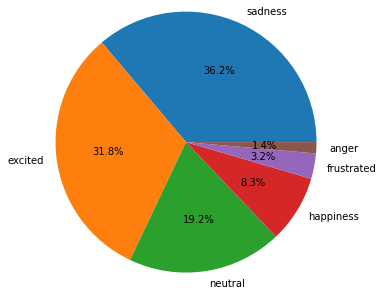

In [23]:

print('sentiments')
lst=list(df.sentiment.value_counts())
lbs=list(pd.unique(df.sentiment))
         
plt.pie(lst,labels=lbs,radius=1.5,autopct="%1.1f%%")
plt.show()

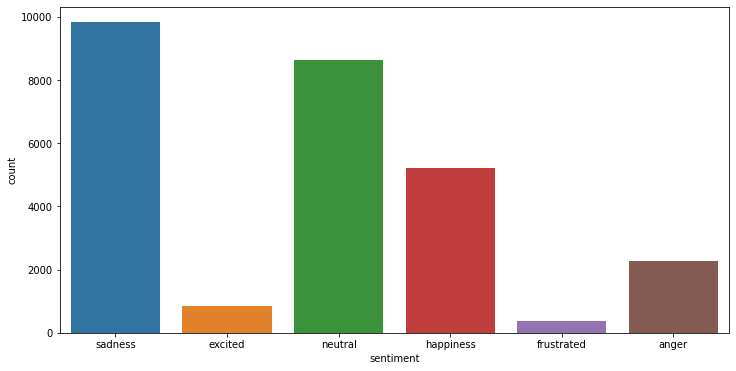

In [24]:
plt.figure(figsize=(12,6))
sn.countplot(x='sentiment',data=df)
plt.show()

# WordCloud Analysis

In [25]:
from wordcloud import WordCloud
def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(word)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def make_string(genre):
    s = ""
    for row_index,row in df.iterrows():
        if(row['sentiment'] == genre):
            s+=(row['content']+' ')
    return s

sadness


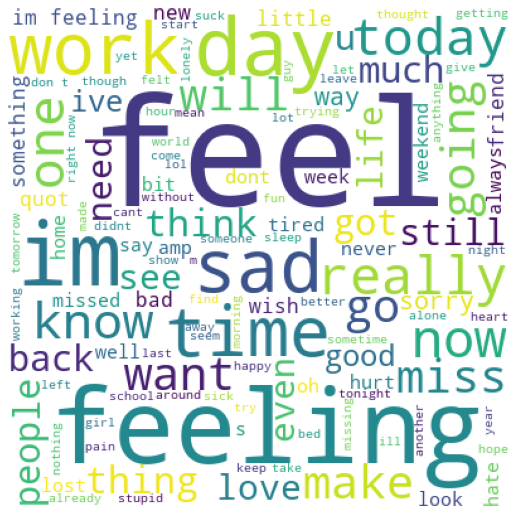

anger


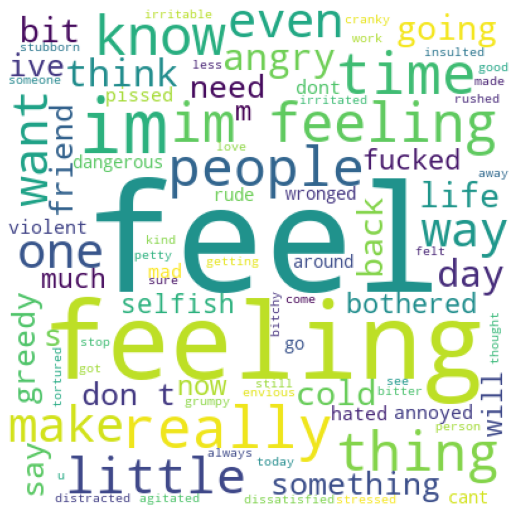

frustrated


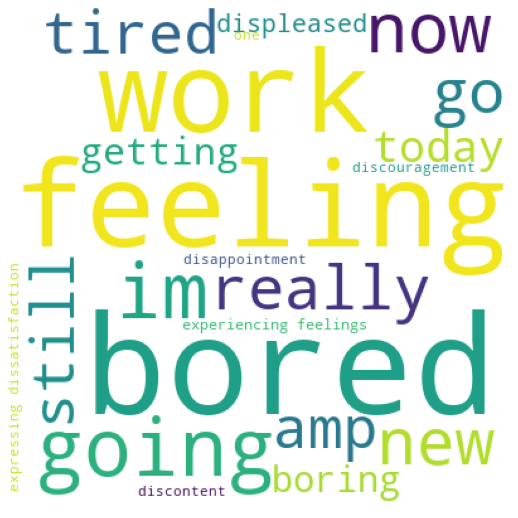

excited


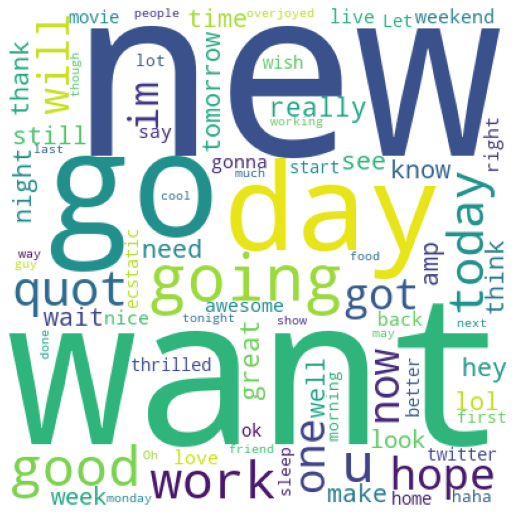

neutral


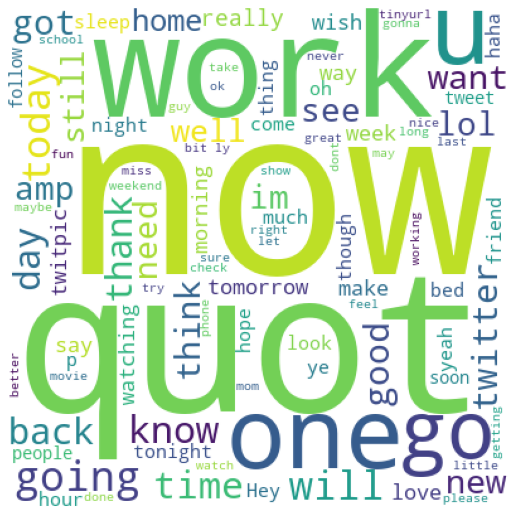

happiness


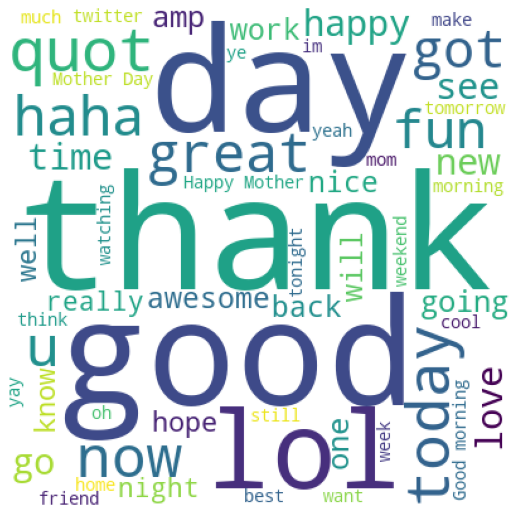

In [26]:
genre = ['sadness', 'anger', 'frustrated', 'excited', 'neutral','happiness']
for Genre in genre:
    word = make_string(Genre)
    print_wordCloud(Genre,word)

# Text Cleaning

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
#list of stopw in English
val=stopwords.words('english')
lst=['twitter','tweet','want','feeling','feel','think','going','go']
for i in lst:
    val.append(i)

In [29]:
#list=['yourself','not','no','between','up','down','before','after','won','don','very','under','once']
#for i in list:
#    val.remove(i)

In [30]:
df_figure=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/values.csv')
j=0
for i in df_figure['li']:
    df.drop([i], inplace=True)
    if j>4000:
        break
    j+=1    
df=df.reset_index(0,50000)

<ipython-input-30-3ec96723feb3>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.reset_index except for the argument 'level' will be keyword-only
  df=df.reset_index(0,50000)


In [31]:
df['sentiment'].value_counts()

sadness       8613
neutral       7593
happiness     4949
anger         2245
excited        769
frustrated     335
Name: sentiment, dtype: int64

In [32]:
j=0
for i in range(len(df['sentiment'])):
  if df['sentiment'][i]=='neutral':
    df.drop([i], inplace=True)
    if j>6000:
        break
    j+=1    
df=df.reset_index(0,50000)

<ipython-input-32-4b4fc3825b14>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.reset_index except for the argument 'level' will be keyword-only
  df=df.reset_index(0,50000)


In [33]:
j=0
for i in range(len(df['sentiment'])):
  if df['sentiment'][i]=='sadness':
    df.drop([i], inplace=True)
    if j>6000:
        break
    j+=1    
df=df.reset_index(0,50000)

<ipython-input-33-0e1765f8bf52>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.reset_index except for the argument 'level' will be keyword-only
  df=df.reset_index(0,50000)


In [34]:
j=0
for i in range(len(df['sentiment'])):
  if df['sentiment'][i]=='happiness':
    df.drop([i], inplace=True)
    if j>3000:
        break
    j+=1    
df=df.reset_index(0,50000)

<ipython-input-34-a5471c335654>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.reset_index except for the argument 'level' will be keyword-only
  df=df.reset_index(0,50000)


In [35]:
df.sentiment.value_counts()

sadness       2611
anger         2245
happiness     1947
neutral       1591
excited        769
frustrated     335
Name: sentiment, dtype: int64

sentiments


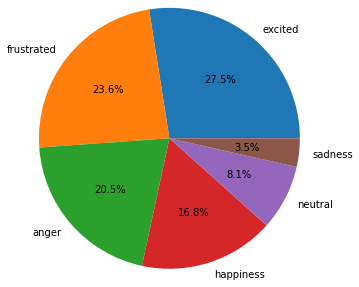

In [36]:

print('sentiments')
lst=list(df.sentiment.value_counts())
lbs=list(pd.unique(df.sentiment))
         
plt.pie(lst,labels=lbs,radius=1.5,autopct="%1.1f%%")
plt.show()

In [37]:
pd.unique(df['sentiment'])

array(['excited', 'frustrated', 'anger', 'happiness', 'neutral',
       'sadness'], dtype=object)

In [38]:
#Cleaning Text using Corpus.
df['Cleaned_Content']=range(0,len(df['content']))
for i in range(len(df)):
    rp=re.sub('[^a-zA-Z]'," ",df['content'][i])
    rp=rp.lower()
    rp=rp.split()
    rp=[word for word in rp if not word in set(val)]
    rp= " ".join(rp)
    df['Cleaned_Content'][i]=rp
    

<ipython-input-38-c54546507185>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Content'][i]=rp
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
from wordcloud import WordCloud
def print_wordCloud(genre,summary):
    print(genre)
    wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate(word)
    plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def make_string(genre):
    s = ""
    for row_index,row in df.iterrows():
        if(row['sentiment'] == genre):
            s+=(row['Cleaned_Content']+' ')
    return s

sadness


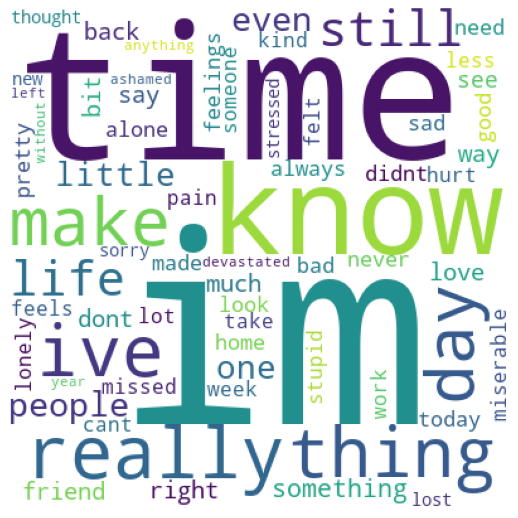

anger


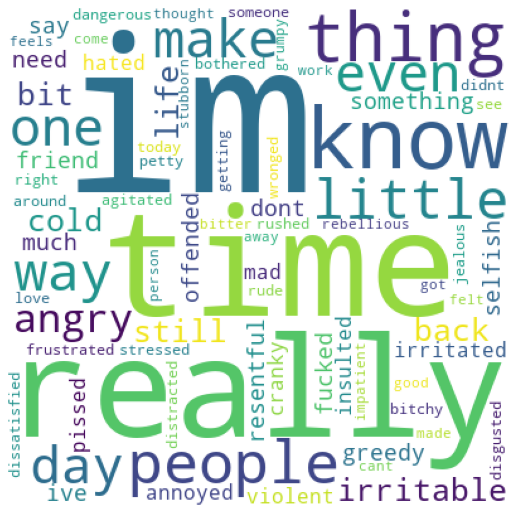

frustrated


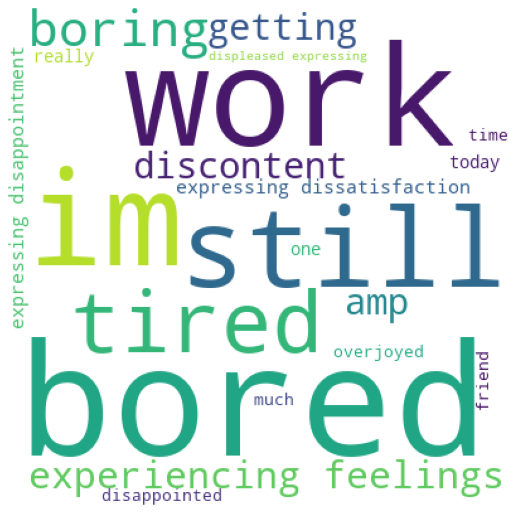

excited


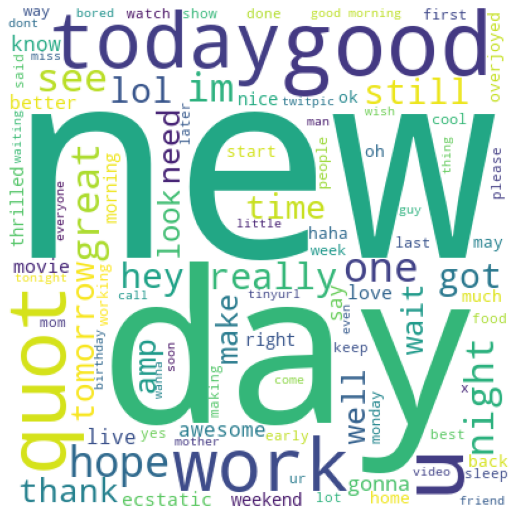

neutral


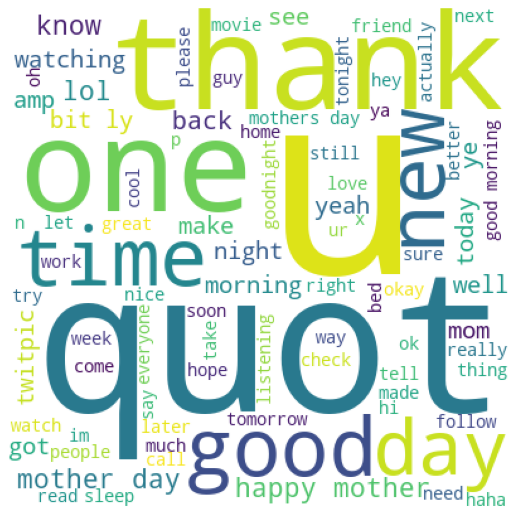

happiness


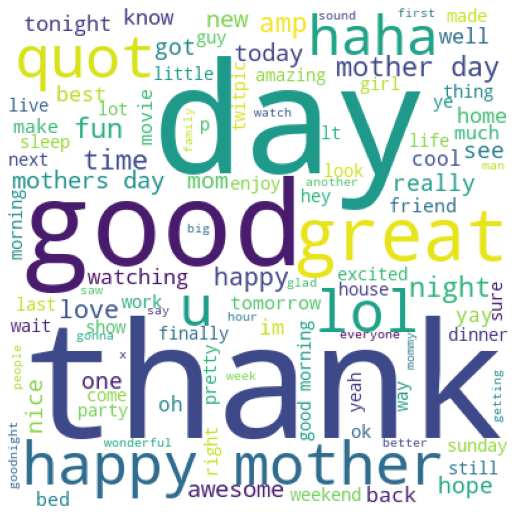

In [40]:
genre = ['sadness', 'anger', 'frustrated', 'excited', 'neutral','happiness']
for Genre in genre:
    word = make_string(Genre)
    print_wordCloud(Genre,word)

In [41]:
neytral_words=['happi','happy','birthday','good','thank','love','mother','nice','glad','life','sorry ','s','m','thanks','feeling','feel','excited']
for i in range(len(df)):
    if df['sentiment'][i]=='neutral':
      rp=re.sub('[^a-zA-Z]'," ",df['content'][i])
      rp=rp.lower()
      rp=rp.split()
      rp=[word for word in rp if not word in set(neytral_words)]
      rp= " ".join(rp)
      df['Cleaned_Content'][i]=rp


neutral


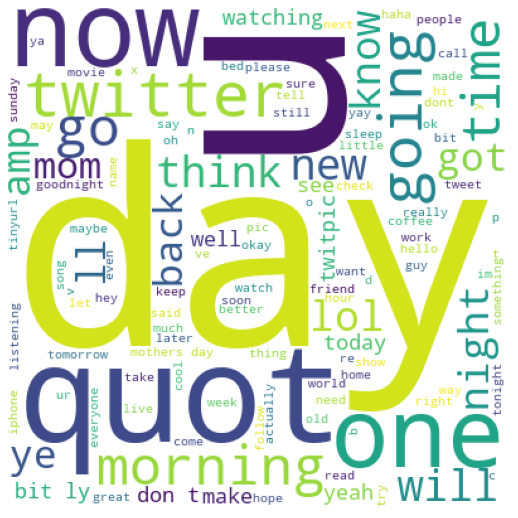

In [42]:
genre = ['neutral']
for Genre in genre:
    word = make_string(Genre)
    print_wordCloud(Genre,word)

# steming

In [43]:
#steming
from nltk.stem import PorterStemmer

df['Cleaned_Content'] = df['Cleaned_Content'].apply(lambda x: " ".join([Word(word).stem() for word in x.split()]))


In [44]:
# Train Test split
X=df['Cleaned_Content']
y=df['sentiment']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# vectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train).toarray()
x_test = tf.transform(x_test).toarray()

In [46]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
y_train = L.fit_transform(y_train)
y_test=L.transform(y_test)

In [47]:
# Saving model to disk
from pickle import dump
dump(tf,open('/content/drive/MyDrive/Colab Notebooks/vect.pkl','wb'))

In [48]:
#vectorizer
from pickle import load
vectorizer = load(open('/content/drive/MyDrive/Colab Notebooks/vect.pkl','rb'))

In [49]:
df.sentiment.value_counts()

sadness       2611
anger         2245
happiness     1947
neutral       1591
excited        769
frustrated     335
Name: sentiment, dtype: int64

# Applying machine learning

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.ensemble  import AdaBoostClassifier
from  xgboost import XGBClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import cross_val_score
from  sklearn.ensemble  import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


import time

In [52]:
models = [LogisticRegression(),MultinomialNB(),BernoulliNB(),RandomForestClassifier()]

In [53]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []

LogisticRegression Successfully Trained


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB Successfully Trained


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.

BernoulliNB Successfully Trained
RandomForestClassifier Successfully Trained


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


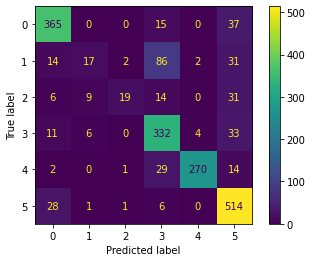

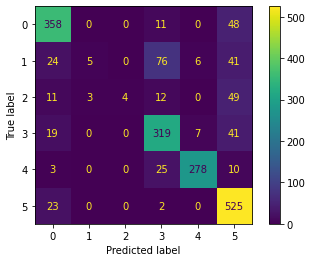

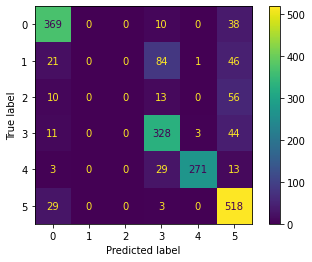

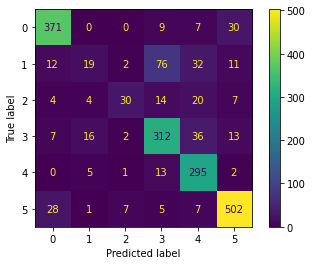

In [54]:

for model in models:
    name = type(model).__name__
    Name.append(name)
    model = OneVsRestClassifier(model)
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    print(name + ' Successfully Trained')
    from pickle import dump
    dump(model,open('/content/drive/MyDrive/Colab Notebooks/log_reg.pkl','wb'))
    plot_confusion_matrix(model,x_test,y_test)

In [55]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score
0,LogisticRegression,0.798421,0.646121,0.773982,0.658169
1,MultinomialNB,0.783684,0.600460,0.808304,0.585123
2,BernoulliNB,0.782105,0.589008,0.540874,0.560542
3,RandomForestClassifier,0.804737,0.674833,0.729083,0.677788


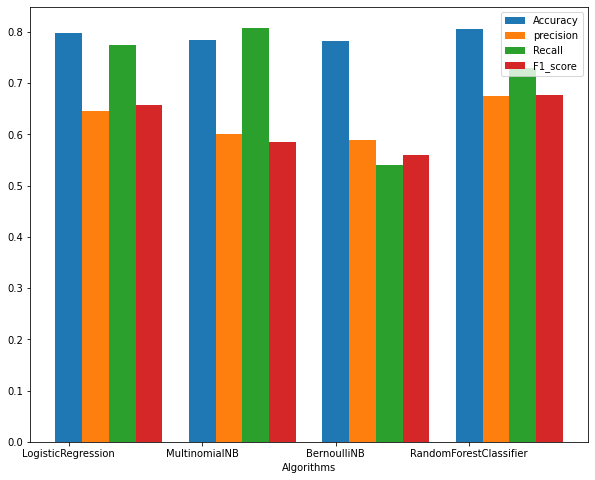

In [56]:
import numpy as np
plt.figure(figsize=(10, 8))  # specify figure size

coampany =Name
revenue=Accuracy
profit=Precision
profit1=Recall
profit2=F1_Score
xpos =np.arange(len(coampany))


plt.bar(xpos+0., Accuracy, width=0.2, label="Accuracy") 
plt.bar(xpos+0.2, Precision, width=0.2, label="precision")
plt.bar(xpos+0.4, Recall, width=0.2, label="Recall")
plt.bar(xpos+0.6, F1_Score, width=0.2, label="F1_score")

plt.xticks(xpos,coampany)
plt.xlabel("Algorithms")
plt.legend()
plt.show()

Re-Building Best Model With Hyper-parameter tunning

In [57]:
lr_clF=LogisticRegression()
lr_clF.fit(x_train,y_train)
prediction = lr_clF.predict(x_test)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


speeech to text detect


In [58]:
!pip install pydub
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


In [59]:
def spech_emotion_detector(audio):
    #Importing library and thir function
    from pydub import AudioSegment
    from pydub.silence import split_on_silence
    import speech_recognition as sr
    r = sr.Recognizer()
    #reading from audio mp3 file
    val=audio+".wav"
    sound = AudioSegment.from_mp3(audio)
    # spliting audio files
    audio_chunks = split_on_silence(sound, min_silence_len=1000, silence_thresh=-30)
    #loop is used to iterate over the output list

    for i, chunk in enumerate(audio_chunks):
       output_file = "chunk{0}.wav".format(i)

       chunk.export(output_file, format="wav")


    for i in range(len(audio_chunks)):
        val='chunk'+str(i)+'.wav'
        try:
            with sr.AudioFile(val) as source:
                audio = r.record(source)

            text = r.recognize_google(audio,show_all=True)
            try:
                text_emotion=text['alternative'][0]['transcript']
                confidence=text['alternative'][0]['confidence']
                emotion=Emotion_detector(text_emotion)
                print(text_emotion,':',emotion[0],'|   confidence: ',confidence)
            except:
                pass
            

        except sr.UnknownValueError:
            pass

        except sr.RequestError as e:
            print("Could not request results from Speech Recognition service; {0}".format(e))


In [60]:

"""def Emotion_detector(text_emotion):


    from textblob import TextBlob

    text = text_emotion

    blob = TextBlob(text)

    sentiment = blob.sentiment

    polarity = sentiment.polarity

    if polarity > 0.5:
        print(text_emotion,": happy.")
    elif polarity > 0:
        print(text_emotion,":  excited.")
    elif polarity == 0:
        print(text_emotion,": neutral.")
    elif polarity > -0.5:
        print(text_emotion,":  sad.")
    elif polarity > -1:
        print(text_emotion,": frustrated.")
    else:
        print(text_emotion,":  angry.")


    #from pickle import load
    #vectorizer = load(open('/content/drive/MyDrive/Colab Notebooks/vect.pkl','rb'))
    #x_test=tf.transform([text_emotion])
    #x_test.shape
    #model = load(open('/content/drive/MyDrive/Colab Notebooks/lr_clf.pkl','rb'))
    #value=lr_clF.predict(x_test)
    #encoder = load(open('/content/drive/MyDrive/Colab Notebooks/encoder.pkl','rb'))
    #val=L.inverse_transform(value)
    #return val"""

'def Emotion_detector(text_emotion):\n\n\n    from textblob import TextBlob\n\n    text = text_emotion\n\n    blob = TextBlob(text)\n\n    sentiment = blob.sentiment\n\n    polarity = sentiment.polarity\n\n    if polarity > 0.5:\n        print(text_emotion,": happy.")\n    elif polarity > 0:\n        print(text_emotion,":  excited.")\n    elif polarity == 0:\n        print(text_emotion,": neutral.")\n    elif polarity > -0.5:\n        print(text_emotion,":  sad.")\n    elif polarity > -1:\n        print(text_emotion,": frustrated.")\n    else:\n        print(text_emotion,":  angry.")\n\n\n    #from pickle import load\n    #vectorizer = load(open(\'/content/drive/MyDrive/Colab Notebooks/vect.pkl\',\'rb\'))\n    #x_test=tf.transform([text_emotion])\n    #x_test.shape\n    #model = load(open(\'/content/drive/MyDrive/Colab Notebooks/lr_clf.pkl\',\'rb\'))\n    #value=lr_clF.predict(x_test)\n    #encoder = load(open(\'/content/drive/MyDrive/Colab Notebooks/encoder.pkl\',\'rb\'))\n    #val=L.

In [64]:

def Emotion_detector(text_emotion):
    rp=re.sub('[^a-zA-Z]'," ",text_emotion)
    rp=rp.lower()
    rp=rp.split()
    rp=[word for word in rp if not word in set(val)]
    rp= " ".join(rp)
    tr=rp
    from pickle import load
    #vectorizer = load(open('/content/drive/MyDrive/Colab Notebooks/vect.pkl','rb'))
    x_test=tf.transform([tr])
    #x_test.shape
    #model = load(open('/content/drive/MyDrive/Colab Notebooks/lr_clf.pkl','rb'))
    value=lr_clF.predict(x_test)
    #encoder = load(open('/content/drive/MyDrive/Colab Notebooks/encoder.pkl','rb'))
    value=L.inverse_transform(value)
    return value 

In [65]:
spech_emotion_detector("/content/drive/MyDrive/Colab Notebooks/trial1.wav")

hello : neutral |   confidence:  0.97219545
hi Krista : happiness |   confidence:  0.73563141
I'm fine what about : neutral |   confidence:  0.8340885
I'm : sadness |   confidence:  0.97219545
what's the : sadness |   confidence:  0.80320001
ask tomorrow is my birthday I'm planning to hold : happiness |   confidence:  0.9382636
wow I'm so excited to enjoy : happiness |   confidence:  0.90082365
hey what's : excited |   confidence:  0.86642087
she want to hold : sadness |   confidence:  0.83169615
I'm so sorry guys I wanted : sadness |   confidence:  0.88916177
don't say that you must have written the party : sadness |   confidence:  0.930457
please excuse me for : sadness |   confidence:  0.97199053
what's the reason : anger |   confidence:  0.94047475
I have an appointment within the handle as my uncle : sadness |   confidence:  0.9158684
oh I feel so sorry for your : happiness |   confidence:  0.90210164
I am sorry : sadness |   confidence:  0.92169422


In [66]:
spech_emotion_detector("/content/drive/MyDrive/Colab Notebooks/trial2.wav")

hey Davina what's : excited |   confidence:  0.84397203
yeah : happiness |   confidence:  0.74319512
hello Auntie how are you : neutral |   confidence:  0.88539994
I'm good now what about you : happiness |   confidence:  0.89722997
I'm going to : sadness |   confidence:  0.88138872
what you guys : sadness |   confidence:  0.83788329
me and Jenny discussing to plan a trip : excited |   confidence:  0.81286418
mom can you give me permission to me and Jenny to go for : happiness |   confidence:  0.9171344
how many of your plan for the : anger |   confidence:  0.89667225
we both are planning : sadness |   confidence:  0.86308789
no I can't you permission to only both : sadness |   confidence:  0.90202016
auntie please we will be safe and : sadness |   confidence:  0.91621292
talking to just you Ma only YouTube people are going : sadness |   confidence:  0.85289031
as my classmates are planning to join the Jeep as they : happiness |   confidence:  0.93855673
East : sadness |   confidence:  

In [67]:
spech_emotion_detector("/content/drive/MyDrive/Colab Notebooks/trial3.wav")

hello what can I do for : neutral |   confidence:  0.94123322
Good Morning America I don't feel : happiness |   confidence:  0.89656442
come : happiness |   confidence:  0.57182938
open : sadness |   confidence:  0.97219545
since how long are you not feeling well : happiness |   confidence:  0.93536884
no problem did you have stomach pain yesterday : sadness |   confidence:  0.90560615
doctor I feel like we and do not feel like : sadness |   confidence:  0.94567549
okay and : happiness |   confidence:  0.88416612
I feel like : sadness |   confidence:  0.97219545
do you drink a lot of : happiness |   confidence:  0.95973253
I don't have water : happiness |   confidence:  0.94074935
did you take my any : sadness |   confidence:  0.907996
I do : sadness |   confidence:  0.7987929


In [68]:
spech_emotion_detector("/content/drive/MyDrive/Colab Notebooks/trial4.wav")

import : sadness |   confidence:  0.97219545
education helps a person to get knowledge and improve confidence in life : sadness |   confidence:  0.96718782
can help you improve your career and your personal : sadness |   confidence:  0.95320851
uneducated person can become a great citizen : happiness |   confidence:  0.95959485
it helps you to take the right decisions : sadness |   confidence:  0.9712826
the modern developed an industrialized world is running on the wheels of educ : sadness |   confidence:  0.93634993
will be able to survive in the competitive world we all need education as it taught that leads the : sadness |   confidence:  0.93737936
various features of Education which outline the importance of human life : anger |   confidence:  0.93433684
safety against : sadness |   confidence:  0.96092594
men's EMP : sadness |   confidence:  0.8158049
removing pover : sadness |   confidence:  0.93980545


In [69]:
spech_emotion_detector("/content/drive/MyDrive/Colab Notebooks/trial5.wav")

I would like to speak some words about my : sadness |   confidence:  0.95698726
friends are our greatest treasure in life among them we call the person closest to us our best friend our best friend is someone who can share everything : happiness |   confidence:  0.96491814
they always support us and stay by : happiness |   confidence:  0.91205108
robot good and bad : happiness |   confidence:  0.85949296
they also helps us improve ourselves as individ : happiness |   confidence:  0.95092046
the bond between westerns is indeed Unbreak : sadness |   confidence:  0.9121415
11 care for each other more than anything best friends bring the greatest show : happiness |   confidence:  0.90417951
this year of a jokes and they're always ready to help : sadness |   confidence:  0.93278193
the memories that we share with our best friend at the most amazing memories of : happiness |   confidence:  0.92635989
conclude I hope we all find our best friends and make beautiful memories : happiness |   con

In [70]:
spech_emotion_detector("/content/drive/MyDrive/Colab Notebooks/trial6.wav")

pollution has become one of the most concerning issues for our planet and mank : sadness |   confidence:  0.95360619
it takes place when pollutants contaminate our envir : sadness |   confidence:  0.96313155
another word pollution is responsible for disturbing the balance of the ecos : sadness |   confidence:  0.95457488
moreover it impacts our lifestyle severely and also contributes greatly to Global : sadness |   confidence:  0.95968705
